

 **PCA**  

In [ ]:
# i ) generate random data matrix
import numpy as np
import matplotlib.pyplot as plt
import math

#fix random seed
np.random.seed(777)

#create random dataset
N = 1000 #samples
M = 100 #features
data = np.random.randn(N,M)
print('data.shape: ', data.shape)

data.shape:  (1000, 100)


In [ ]:
# ii )
# convert to zero centered data
centered_data = data - np.mean(data, axis=0)

# covariance matrix
cov = np.dot(centered_data.T, centered_data)  #beacuse its mean = 0
cov = cov/(N-1)

# get eigen vector/value of covariace matrix
val, vec = np.linalg.eig(cov) # val : eigen value  , vec : eigen vector

In [ ]:
# rearrange eigen value/vector
idx = np.argsort(val)[::-1] # decreasing order
print('  eigenvalue.shape: ',val.shape)
print(' eigenvector.shape: ',vec.shape) 

val_sorted =  val[idx]
vec_sorted = vec[:,idx]

  eigenvalue.shape:  (100,)
 eigenvector.shape:  (100, 100)


In [ ]:
# project data to vec_sorted (i.e. project to new axis)
# dim reduction : (1000,100) --> (1000,P)
P = 100
result_data = data.dot(vec_sorted[:, :P])

In [ ]:
# get variance array
var = np.var(result_data ,axis =0)
print('result_data.shape: ',result_data.shape)
print('        var.shape: ',var.shape)

# get explained variance array
# ratio of explained variance for each eigen value

explained_var = [i/sum(val_sorted)*100 for i in val_sorted]
print('explained_var_len: ', len(explained_var))

result_data.shape:  (1000, 100)
        var.shape:  (100,)
explained_var_len:  100


In [ ]:
print(var)
print(explained_var) 
# slightly different ( because the two variance values have different meanings )

[1.69536403 1.66669049 1.62870812 1.61657148 1.57121123 1.54928097
 1.53689624 1.5225577  1.49155536 1.48380285 1.46802825 1.42987916
 1.41115594 1.40146539 1.3830704  1.3660218  1.35939918 1.34449232
 1.33442977 1.32303571 1.30293571 1.29080092 1.27694566 1.27157127
 1.25371806 1.2296866  1.22575576 1.22418792 1.20257912 1.18735784
 1.1769636  1.15905225 1.14917103 1.14573019 1.12856112 1.11625092
 1.11166101 1.10626405 1.09494056 1.08203592 1.06096821 1.05344393
 1.04480374 1.02669245 1.01240249 1.00565195 0.99673952 0.98487288
 0.97972992 0.96558835 0.95601962 0.94796676 0.93886793 0.93353876
 0.9221509  0.91465111 0.90892976 0.90277237 0.89434805 0.87267744
 0.87024507 0.85426728 0.84401491 0.83784588 0.8321854  0.81841515
 0.81460225 0.80535672 0.79656401 0.79130493 0.78198892 0.77398406
 0.75495389 0.74620207 0.73883137 0.72300134 0.72062085 0.71740438
 0.71262345 0.70479833 0.69115926 0.68672984 0.6810566  0.67911138
 0.6601912  0.65412622 0.63798072 0.62371679 0.60683453 0.6008

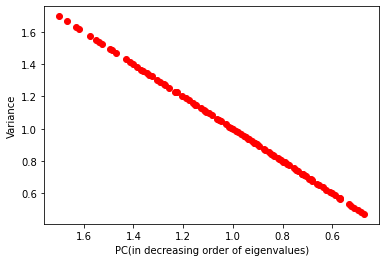

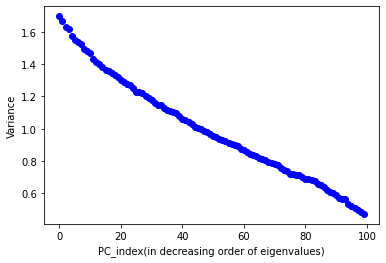

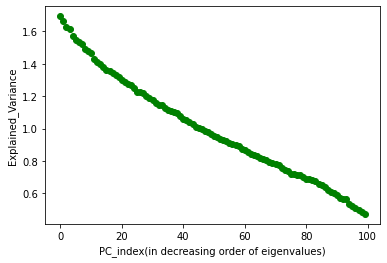

In [ ]:
# iii ) draw a plot

# larger variance <=> larger eigen value of covariance matrix 
## can be seen in three ways by placing the x-axis and y-axis differently

# x-axis : PC (i.e. eigenvalue in  decresing order)
# y-axis : variance of result data
plt.plot(val_sorted, var,'ro')
plt.gca().invert_xaxis() #rearrange in decreasing order
plt.xlabel('PC(in decreasing order of eigenvalues)')  
plt.ylabel('Variance')
plt.show()

# x-axis : index of PC (1 to 100)
# y-axis : variance of result data
plt.plot(var,'bo')
plt.xlabel('PC_index(in decreasing order of eigenvalues)')
plt.ylabel('Variance')
plt.show()


# x-axis : index of PC (1 to 100)
# y-axis : variance of explained data
plt.plot(explained_var,'go')
plt.xlabel('PC_index(in decreasing order of eigenvalues)')
plt.ylabel('Explained_Variance')
plt.show()



#Q2 Dense Network

In [ ]:
import torch
torch.set_default_dtype(torch.float64)

import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
plt.rcParams["figure.figsize"]=(10,7)

# comment out the below if don"t have a 4k or retina display
%config InlineBackend.figure_format="retina"

## Data 

In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving egg_times.csv to egg_times (1).csv


In [ ]:
egg_timing_df = pd.read_csv("egg_times.csv",index_col=0)
print(egg_timing_df.head(n=10))

print('\n max_weight: ',max(egg_timing_df["weight"]))
print('mean_weight: ',np.mean(egg_timing_df["weight"]))
print(' std_weight: ',np.std(egg_timing_df["weight"]))

   weight  time  outcome
0    55.0   7.1        2
1    55.2   2.8        0
2    59.2   5.1        2
3    47.3   2.1        0
4    62.9   6.8        2
5    51.0   3.0        0
6    58.6   6.4        2
7    52.4   1.5        0
8    55.3   4.6        2
9    56.5   4.8        1

 max_weight:  69.5
mean_weight:  55.06291079812208
 std_weight:  5.0245517689382995


In [ ]:
egg_timing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 638
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   weight   639 non-null    float64
 1   time     639 non-null    float64
 2   outcome  639 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 20.0 KB


In [ ]:
train_ = egg_timing_df[["weight","time"]].values # TensorFlow/Keras likes numpy/arrays rather than Dataframes
target_ = egg_timing_df["outcome"].values #.to_numpy()

train_in = train_[:-50] # get all except the last 50 for training
train_target = target_[:-50]

val_in = train_[-50:] # take all from the last 50 for validation
val_target = target_[-50:]

In [ ]:
n = len(target_)
num_underdone = sum(target_==0)
print(num_underdone)
num_softboiled = sum(target_==1)
print(num_softboiled)
num_hardboiled = sum(target_==2)
print(num_hardboiled)

# class_weights = {0:underdone_class_weight, 1:softboiled_class_weight, 2: hardboiled_class_weight}

202
117
320


In [ ]:
underdone = egg_timing_df[egg_timing_df["outcome"]==0][:117]
softboiled = egg_timing_df[egg_timing_df["outcome"]==1]
hardboiled = egg_timing_df[egg_timing_df["outcome"]==2][:117]

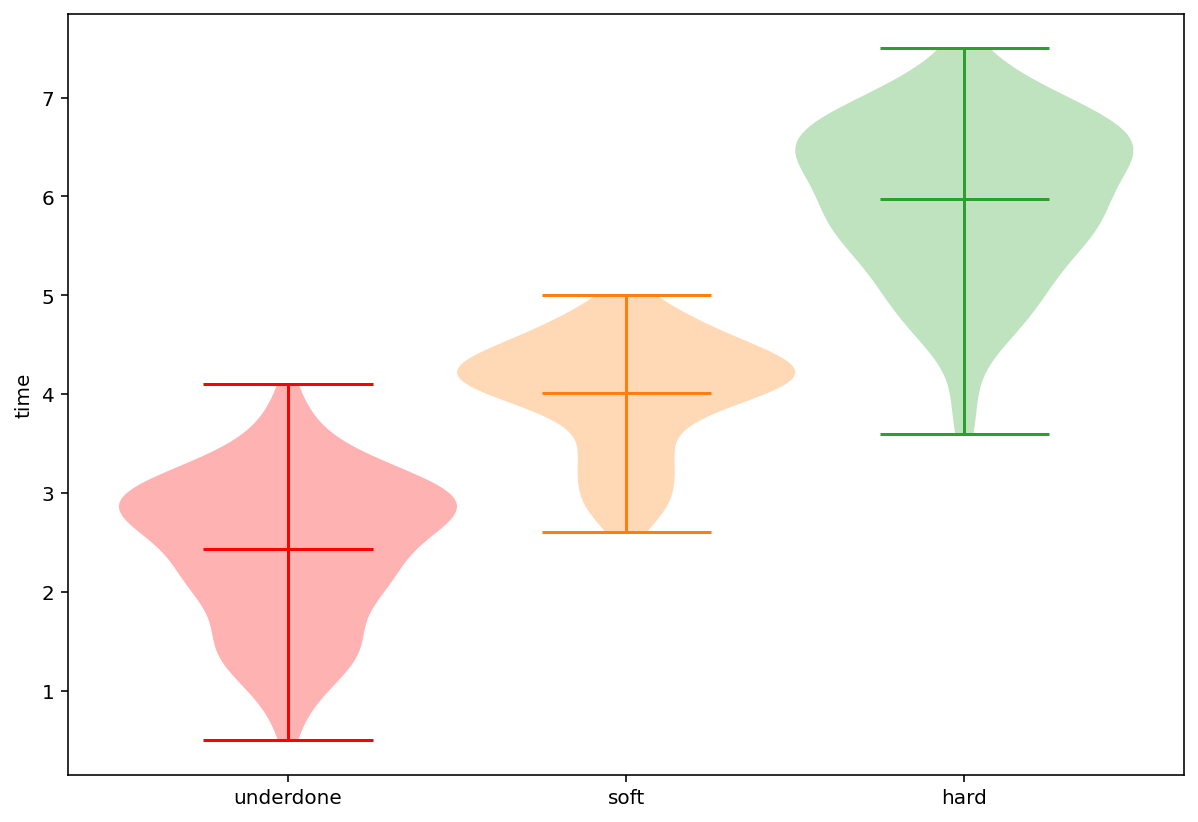

In [ ]:
violin_parts = plt.violinplot(underdone['time'], positions=[0], showmeans=True)
# over-ride default blue color, you can't use 'color' parameter as can on histograms etc
for pc in violin_parts['bodies']: # used to
    pc.set_facecolor('red')
    violin_parts['cbars'].set_edgecolor('red')
    violin_parts['cmaxes'].set_edgecolor('red')
    violin_parts['cmins'].set_edgecolor('red')
    violin_parts['cmeans'].set_edgecolor('red')
    plt.violinplot(softboiled['time'], positions=[0.5], showmeans=True)
    plt.violinplot(hardboiled['time'], positions=[1], showmeans=True)
    plt.ylabel("time")
    plt.xticks([0,0.5,1],["underdone", "soft", "hard"])

In [ ]:
len(train_)

639

In [ ]:
class EggTimesDataset(torch.utils.data.dataset.Dataset):
    def __init__(self, df):

        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        features = self.df.iloc[idx, :-1].values
        outcomes = np.array(self.df.iloc[idx, -1])

        example = {"features": features, "outcomes": outcomes}

        return example

train_dataset = EggTimesDataset(egg_timing_df[:-50])
test_dataset = EggTimesDataset(egg_timing_df[-50:])

In [ ]:
train_dataset[0]

{'features': array([55. ,  7.1]), 'outcomes': array(2)}

In [ ]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=50,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=50,
                                          shuffle=True, num_workers=1)

## Model

####Original model

In [ ]:
class DenseModel_origin(nn.Module):
    def __init__(self, num_in):
       2*32 + 32 +  32*6 + 6 + 6*3 +3 super(DenseModel_origin, self).__init__()

        self.fc1 = nn.Linear(num_in, 32)
        self.fc2 = nn.Linear(32, 6)
        self.fc3 = nn.Linear(6, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

origin_mdl = DenseModel_origin(2)

###Modification #1

In [ ]:
class DenseModel_1(nn.Module):
    def __init__(self, num_in):

        super(DenseModel_1, self).__init__()

        self.fc1 = nn.Linear(num_in, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 6)
        self.fc6 = nn.Linear(6, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

modi_1 = DenseModel_1(2)

###Modification #2

In [ ]:
class DenseModel_2(nn.Module):
    def __init__(self, num_in):

        super(DenseModel_2, self).__init__()

        self.fc1 = nn.Linear(num_in, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

modi_2 = DenseModel_2(2)

###Modification #3

In [ ]:
class DenseModel_3(nn.Module):
    def __init__(self, num_in):

        super(DenseModel_3, self).__init__()

        self.fc1 = nn.Linear(num_in, 32)
        self.fc2 = nn.Linear(32, 6)
        self.fc3 = nn.Linear(6, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

modi_3 = DenseModel_3(2)

## Training loop 

In [ ]:
mdl_lst = ['origin_mdl',' modi_1',' modi_2','modi_3']

#get result by dictionary 'result'
result = {}

for m,model in enumerate([origin_mdl, modi_1, modi_2,modi_3]) : 

    print(f'\n------ {mdl_lst[m]} ----------------------------------------\n')
    print(model)
    learning_rate=0.001
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) 
    
    acc = []
    for r in range(5):   #try 5 times      
        best_acc = 0
        for epoch in range(800): # epoch = 800

            running_loss = []
            for i, batch in enumerate(trainloader):
                
                inputs = batch["features"]
                labels = batch["outcomes"]
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss.append(loss.item())

                freq_checks = 200    #print loss by 200 epoch
            if epoch % freq_checks == 0:
                print("epoch: {} loss: {:.3f}".format(epoch, sum(running_loss) / len(running_loss)))
            running_loss = []
            for data in testloader:
                test_inputs = data["features"]
                test_labels = data["outcomes"]
                outputs = model(test_inputs)
                _, predicted = torch.max(outputs, 1)
                test_acc = sum(np.array(predicted)==np.array(test_labels))/len(predicted) 
                #print("Test accuracy:",test_acc )
                if test_acc > best_acc :
                    best_acc = test_acc
        print(f'** TRY[{r}] Best_acc {best_acc}\n')  # print best accuracy
        acc.append(best_acc)
    
    avg_acc = sum(acc)/float( len(acc) )
    print(f'   Best_Acc: {acc}')
    print(f'Average_Acc: {avg_acc}')
    result[mdl_lst[m]] = avg_acc
    print(result)


------ origin_mdl ----------------------------------------

DenseModel_origin(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=3, bias=True)
)
epoch: 0 loss: 1.551
epoch: 200 loss: 0.198
epoch: 400 loss: 0.184
epoch: 600 loss: 0.187
** TRY[0] Best_acc 0.9

epoch: 0 loss: 0.185
epoch: 200 loss: 0.177
epoch: 400 loss: 0.183
epoch: 600 loss: 0.175
** TRY[1] Best_acc 0.88

epoch: 0 loss: 0.182
epoch: 200 loss: 0.178
epoch: 400 loss: 0.180
epoch: 600 loss: 0.170
** TRY[2] Best_acc 0.88

epoch: 0 loss: 0.178
epoch: 200 loss: 0.170
epoch: 400 loss: 0.169
epoch: 600 loss: 0.181
** TRY[3] Best_acc 0.88

epoch: 0 loss: 0.167
epoch: 200 loss: 0.172
epoch: 400 loss: 0.168
epoch: 600 loss: 0.170
** TRY[4] Best_acc 0.88

   Best_Acc: [0.9, 0.88, 0.88, 0.88, 0.88]
Average_Acc: 0.884
{'origin_mdl': 0.884}

------  modi_1 ----------------------------------------

DenseModel_1(
  (fc1): Lin

In [ ]:
#print total result
print(result)

{'origin_mdl': 0.884, 'modi_1': 0.9, 'modi_2': 0.9, 'modi_3': 0.9}
